In [5]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [7]:
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

In [8]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

In [9]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [10]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [26]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [12]:
reviews = list(train_df['review'])

In [28]:
# 리뷰 문장을 단어 단위로 쪼개기
tokenized_reviews = [r.split() for r in reviews]
#print(reviews[0])
#print(tokenized_reviews[0])

In [40]:
# 쪼개진 각 리뷰 문장의 단어 개수
review_len_by_token = [len(t) for t in tokenized_reviews]
#print(review_len_by_token[:10])

In [41]:
# 쪼개진 각 리뷰 문장의 문자(음절) 개수
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]
#print(review_len_by_eumjeol[:10])

Text(0, 0.5, 'Number of Reviews')

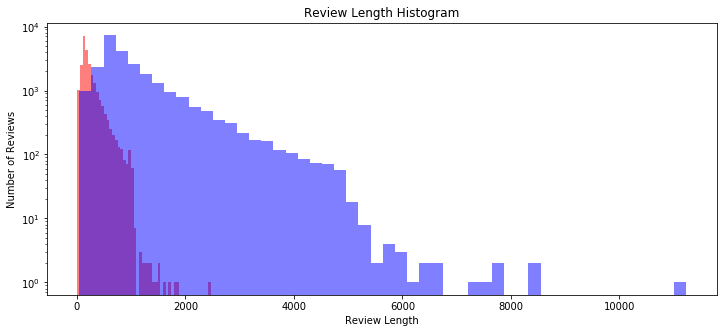

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [17]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x23056441e48>,
 'caps': [<matplotlib.lines.Line2D at 0x23056420518>,
 'boxes': [<matplotlib.lines.Line2D at 0x23056441cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x23056420ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2305645a240>],
 'means': [<matplotlib.lines.Line2D at 0x23056420ef0>]}

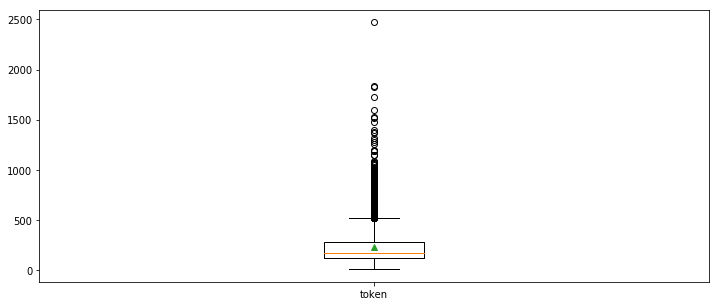

In [18]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)  

{'whiskers': [<matplotlib.lines.Line2D at 0x230564a2b00>,
 'caps': [<matplotlib.lines.Line2D at 0x230564aa1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230564a29b0>],
 'medians': [<matplotlib.lines.Line2D at 0x230564aa860>],
 'fliers': [<matplotlib.lines.Line2D at 0x230564aaeb8>],
 'means': [<matplotlib.lines.Line2D at 0x230564aaba8>]}

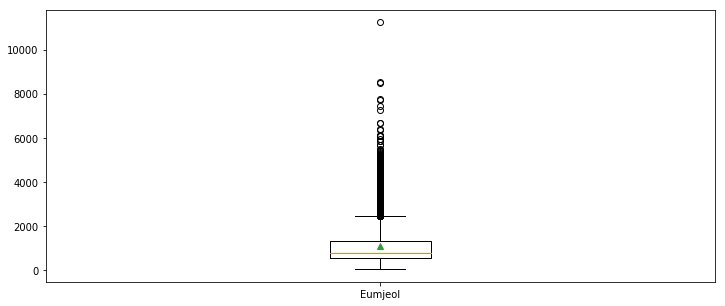

In [19]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

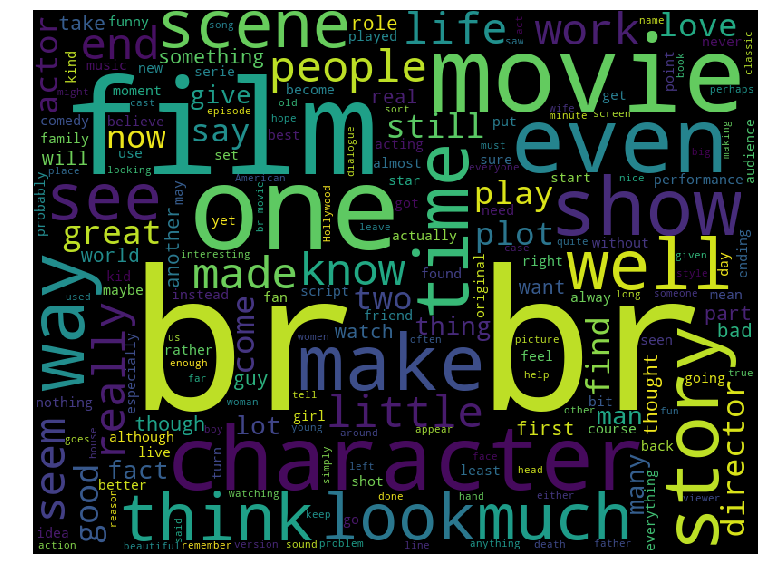

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', 
                      width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

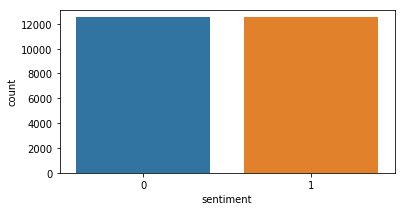

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])